# Machine Learning Model Evaluation Metrics Part I. Classification


# Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    
from sklearn.model_selection import train_test_split

# Pipeline library for Training
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


# Data Preprocessing (using Pipelines)

In [21]:
# Road the data
X = pd.read_csv("titanic/train.csv")
X_test = pd.read_csv("titanic/test.csv")
print(X.shape, X_test.shape)


# Remove rows with missing target, seperate target from predictors
X.dropna(axis=0, subset=['Survived'], inplace=True)
y = X.Survived
X.drop(['Survived'], axis=1, inplace=True)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == 'object']

# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['float64', 'int64']]

# keep selected columns only
my_cols = categorical_cols + numerical_cols
X = X[my_cols].copy()
X_test = X[my_cols].copy()

(891, 12) (418, 11)


In [22]:
X_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X_ = pd.read_csv("titanic/train.csv")

/Users/akashdeepmakkar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

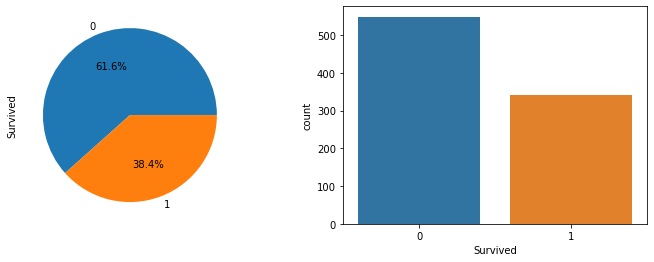

In [4]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

X_['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])

sns.countplot('Survived', data=X_, ax=ax[1])

## Pipelines for training

* numerical_transformer/categorical_transformer
* preprocessor(ColumnTransformer)
* define model
* Bundle preprocessing and modeling
* Preprocessing of training data, fit model
* Preprocessing of validation data, get predictions

In [5]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
        transformers =[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

# Modeling & Evaluate Score



In [6]:
# model = LogisticRegression()
# rf_clf = RandomForestClassifier()

In [7]:
from sklearn.linear_model import LogisticRegression

rf_clf = LogisticRegression()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_clf)
])

print(cross_val_score(clf, X, y, cv=10).mean())

/Users/akashdeepmakkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akashdeepmakkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

0.7945942571785268


/Users/akashdeepmakkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akashdeepmakkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

# Model Evaluation
## 1. Confusion Matrix
A <code>confusion</code> matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

<img src="https://i.ytimg.com/vi/AOIkPnKu0YA/maxresdefault.jpg" width=600 />

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<AxesSubplot:>

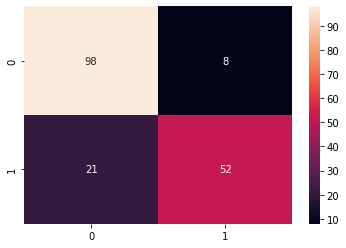

In [9]:
# train_test_split: 80%, 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# modeling
rf_clf = RandomForestClassifier()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_clf)
])

# train
clf.fit(X_train, y_train)
preds = clf.predict(X_val)


# confusion_matrix
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True, fmt="d")

### Accuracy
<code>Accuracy</code> in classification problems is the number of correct predictions made by the model over all kinds predictions made

<img src="https://cdn-images-1.medium.com/max/1600/1*5XuZ_86Rfce3qyLt7XMlhw.png" width=600 >

In [10]:
clf.score(X_val, y_val)  # Return the mean accuracy on the given test data and labels

0.8379888268156425

In [11]:
accuracy_score(y_val, preds)

0.8379888268156425

✔️ When to use Accuracy? (Important!)<br>

<code>Accuracy</code> is good measure when the target variable class in the data are nearly balanced. example Survived(60%-yes, 40% no)

### Precision

<code>Precision</code> is defined as the number of true positives divided by the number of true positives plus the number of false positives. Precision is about being precise

<img src="https://cdn-images-1.medium.com/max/640/1*KhlD7Js9leo0B0zfsIfAIA.png" width=600>

### Recall

When it is actually the positive result, how often does it predict correcly

<img src="https://cdn-images-1.medium.com/max/640/1*a8hkMGVHg3fl4kDmSIDY_A.png" width=600>

### F1-Score

<code>F1 score</code> is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. <br>
Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, <code>especially if you have an uneven class distribution</code>

<img src="https://cdn-images-1.medium.com/max/1600/1*UJxVqLnbSj42eRhasKeLOA.png">

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       106
           1       0.87      0.71      0.78        73

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



### Auc - Roc curve

<code>AUC-ROC</code> curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. <br>
It tells how much model is capable of distinguishing between classes.<br>
Higher the AUC, better the model is at predicting 0s and 1s as 1as.<br>
By analogy, Higher the AUC, better the model is at distinguishing between survived and not

The ROC curve is plotted with TPR against the FPR .

<img src="https://cdn-images-1.medium.com/max/1600/1*pk05QGzoWhCgRiiFbz-oKQ.png">

ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests.

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

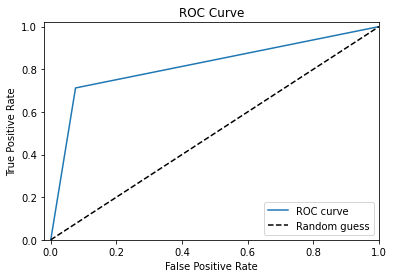

In [14]:
fpr, tpr, thresholds = roc_curve(y_val,preds)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Summary

## TL;DR
* <code>Accuracy</code>: is good measure when the target variable class in the data are nearly balanced. example Survived(60%-yes, 40% no) 
* <code>f1-Score</code>: is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.<br>
    * *if you have an <code>uneven class distribution</code>? than use f1-score*
* <code>AUC-ROC curve</code> is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability.


In [15]:
# https://www.kaggle.com/code/leeyj0511/model-evaluation-1-classification-metrics/data?select=train.csv